## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

### Dataset

For this homework, we'll use the Car Fuel Efficiency dataset. Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

You can do it with wget:
```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
```

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

### Preparing the dataset 

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

### EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail? 

### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`


### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If multiple options give the same best RMSE, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw02
* If your answer doesn't match options exactly, select the closest one

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
df_small = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df_small.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


Text(0.5, 0, 'Fuel Efficiency (mpg)')

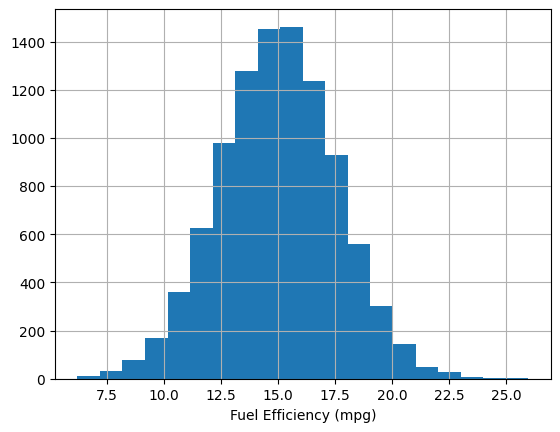

In [6]:
df['fuel_efficiency_mpg'].hist(bins=20)
plt.xlabel('Fuel Efficiency (mpg)')

In [7]:
# Homework: Car Fuel Efficiency (clean, reproducible)

# 0. Download dataset (works in Codespace / Linux). If already downloaded, skip this.
# !wget -nc https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

# 1. Load data and keep requested columns
# df = pd.read_csv("car_fuel_efficiency.csv")

cols = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]
df = df[cols].copy()

# Quick look
print("Rows:", len(df))
print("Columns:", df.columns.tolist())

# ---------- EDA ----------
# Check distribution of target (long tail?)
print("\nTarget (fuel_efficiency_mpg) description:")
print(df['fuel_efficiency_mpg'].describe())

# Q1: Which column has missing values?
missing_counts = df.isnull().sum()
print("\nMissing values per column:\n", missing_counts)
q1_answer = missing_counts[missing_counts > 0].index.tolist()
print("Q1 - Column(s) with missing values:", q1_answer)

# Q2: median of horsepower
median_hp = df['horsepower'].median()
print("\nQ2 - Median horsepower:", median_hp)

# ---------- Prepare & split ----------
def split_train_val_test(df_full, seed=42):
    df_shuffled = shuffle(df_full, random_state=seed).reset_index(drop=True)
    n = len(df_shuffled)
    n_train = int(0.6 * n)
    n_val = int(0.2 * n)
    df_train = df_shuffled.iloc[:n_train].reset_index(drop=True)
    df_val = df_shuffled.iloc[n_train:n_train+n_val].reset_index(drop=True)
    df_test = df_shuffled.iloc[n_train+n_val:].reset_index(drop=True)
    return df_train, df_val, df_test

# default seed 42 split
df_train, df_val, df_test = split_train_val_test(df, seed=42)

# Q3: compare filling NA with 0 vs with training mean
features = ['horsepower', 'vehicle_weight', 'engine_displacement', 'model_year']  # using the four predictors
target = 'fuel_efficiency_mpg'

# Prepare copies
train_0 = df_train.copy()
val_0 = df_val.copy()

train_mean = df_train.copy()
val_mean = df_val.copy()

# Option 1: fill missing horsepower with 0 (and generally any other NaNs with 0)
train_0 = train_0.fillna(0)
val_0 = val_0.fillna(0)

# Option 2: fill with mean computed from training only
# compute training means for numeric columns used (important: based on train only)
train_means = df_train[features].mean()
train_mean[features] = train_mean[features].fillna(train_means)
val_mean[features] = val_mean[features].fillna(train_means)

# Helper train & evaluate
def rmse_for(train_df, val_df, features, target):
    X_train = train_df[features].values
    y_train = train_df[target].values
    X_val = val_df[features].values
    y_val = val_df[target].values
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    return round(rmse, 2)

rmse_fill0 = rmse_for(train_0, val_0, features, target)
rmse_fillmean = rmse_for(train_mean, val_mean, features, target)

print("\nQ3 - RMSE (fill with 0):", rmse_fill0)
print("Q3 - RMSE (fill with mean-from-train):", rmse_fillmean)

if rmse_fillmean < rmse_fill0:
    q3_answer = "With mean"
elif rmse_fillmean > rmse_fill0:
    q3_answer = "With 0"
else:
    q3_answer = "Both are equally good"
print("Q3 answer:", q3_answer)

# ---------- Q4: Regularized linear regression (Ridge) with NAs filled with 0 ----------
r_list = [0, 0.01, 0.1, 1, 5, 10, 100]
# Note: sklearn Ridge uses alpha parameter. For r=0 we will use LinearRegression (alpha ~ 0)
rmse_by_r = {}
for r in r_list:
    # prepare data: fill NAs with 0 (as requested)
    tr = df_train.fillna(0)
    va = df_val.fillna(0)
    X_tr = tr[features].values
    y_tr = tr[target].values
    X_va = va[features].values
    y_va = va[target].values

    if r == 0:
        model = LinearRegression()
    else:
        model = Ridge(alpha=r)  # alpha = r
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_va)
    rmse = round(np.sqrt(mean_squared_error(y_va, y_pred)), 2)
    rmse_by_r[r] = rmse

print("\nQ4 - RMSE by r:")
for r, rm in rmse_by_r.items():
    print(f" r={r}: RMSE={rm}")

# Which r gives best RMSE (if tie choose smallest r)
best_r = min(sorted(rmse_by_r.keys()), key=lambda k: (rmse_by_r[k], k))
print("Q4 answer (best r):", best_r)

# ---------- Q5: effect of seed on RMSE ----------
seeds = list(range(10))  # 0..9
rmse_seeds = []
for s in seeds:
    tr, va, te = split_train_val_test(df, seed=s)
    tr = tr.fillna(0)
    va = va.fillna(0)
    rm = rmse_for(tr, va, features, target)
    rmse_seeds.append(rm)

std_rmse = round(np.std(rmse_seeds), 3)
print("\nQ5 - RMSEs for seeds 0..9:", rmse_seeds)
print("Q5 - std of RMSEs (np.std):", std_rmse)

# ---------- Q6: seed=9, combine train+val, fill NA with 0, r=0.001 ----------
tr, va, te = split_train_val_test(df, seed=9)
train_plus_val = pd.concat([tr, va], ignore_index=True)
train_plus_val = train_plus_val.fillna(0)
test_filled = te.fillna(0)

X_tr = train_plus_val[features].values
y_tr = train_plus_val[target].values
X_te = test_filled[features].values
y_te = test_filled[target].values

model = Ridge(alpha=0.001)  # use Ridge with r=0.001 (almost linear)
model.fit(X_tr, y_tr)
y_pred_test = model.predict(X_te)
rmse_test = round(np.sqrt(mean_squared_error(y_te, y_pred_test)), 2)
print("\nQ6 - RMSE on test (seed=9, r=0.001):", rmse_test)

# ---------- Print answers mapping to provided options ----------
print("\n=== Summary (choose the closest provided option) ===")
# Q1: which column had missing values? we saw above
print("Q1 expected answer: 'horsepower' (if only that column showed missing values)")

print("Q2 median horsepower (choose closest option):", median_hp)
# options: 49,99,149,199

print("Q3 best option:", q3_answer)
# options: With 0 / With mean / Both equally good

print("Q4 best r:", best_r)
# options: 0 / 0.01 / 1 / 10 / 100  (choose smallest in ties)

print("Q5 std:", std_rmse)
# options: 0.001 / 0.006 / 0.060 / 0.600

print("Q6 test RMSE:", rmse_test)
# options: 0.15 / 0.515 / 5.15 / 51.5

# If you want, print them as the multiple choice labels:
# (You can use these printed values to select the closest option on the homework page.)


Rows: 9704
Columns: ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']

Target (fuel_efficiency_mpg) description:
count    9704.000000
mean       14.985243
std         2.556468
min         6.200971
25%        13.267459
50%        15.006037
75%        16.707965
max        25.967222
Name: fuel_efficiency_mpg, dtype: float64

Missing values per column:
 engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64
Q1 - Column(s) with missing values: ['horsepower']

Q2 - Median horsepower: 149.0

Q3 - RMSE (fill with 0): 0.52
Q3 - RMSE (fill with mean-from-train): 0.46
Q3 answer: With mean

Q4 - RMSE by r:
 r=0: RMSE=0.52
 r=0.01: RMSE=0.52
 r=0.1: RMSE=0.52
 r=1: RMSE=0.52
 r=5: RMSE=0.52
 r=10: RMSE=0.52
 r=100: RMSE=0.52
Q4 answer (best r): 0

Q5 - RMSEs for seeds 0..9: [np.float64(0.52), np.float64(0.52), np.float64(0.52), np.float64(0.52), np.float64(0.51), n

In [8]:
# End the notebook